#  1. Medical Diagnosis & Severity Prediction

This notebook presents training and evaluation of multiple machine learning models to predict:

-  **Diagnosis**
-  **Severity**

Models used:  
-  K-Nearest Neighbors  
-  Naive Bayes
-  Random Forest

# 2. Importing Libraries and Dataset

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

In [2]:
# Load the dataset
df = pd.read_csv("disease_diagnosis.csv")

 # 3. Data Preparation Section

##  Data Preparation

We perform preprocessing including:

- Data Visualization
- Feature encoding
- Dropping irrelevant columns
- Splitting into training and testing sets (80/20)

In [3]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Heart_Rate_bpm         0
Body_Temperature_C     0
Blood_Pressure_mmHg    0
Oxygen_Saturation_%    0
Diagnosis              0
Severity               0
Treatment_Plan         0
dtype: int64

**There are no null values in the dataset**

In [4]:
# Get a statistical summary of numeric columns
df.describe()

,Patient_ID,Age,Heart_Rate_bpm,Body_Temperature_C,Oxygen_Saturation_%
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.285000,89.439000,37.741000,94.493500
std,577.494589,17.422616,17.139608,1.309835,2.861827
min,1.000000,18.000000,60.000000,35.500000,90.000000
25%,500.750000,33.000000,75.000000,36.600000,92.000000
50%,1000.500000,49.000000,89.000000,37.700000,95.000000
75%,1500.250000,63.000000,104.000000,38.900000,97.000000
max,2000.000000,79.000000,119.000000,40.000000,99.000000


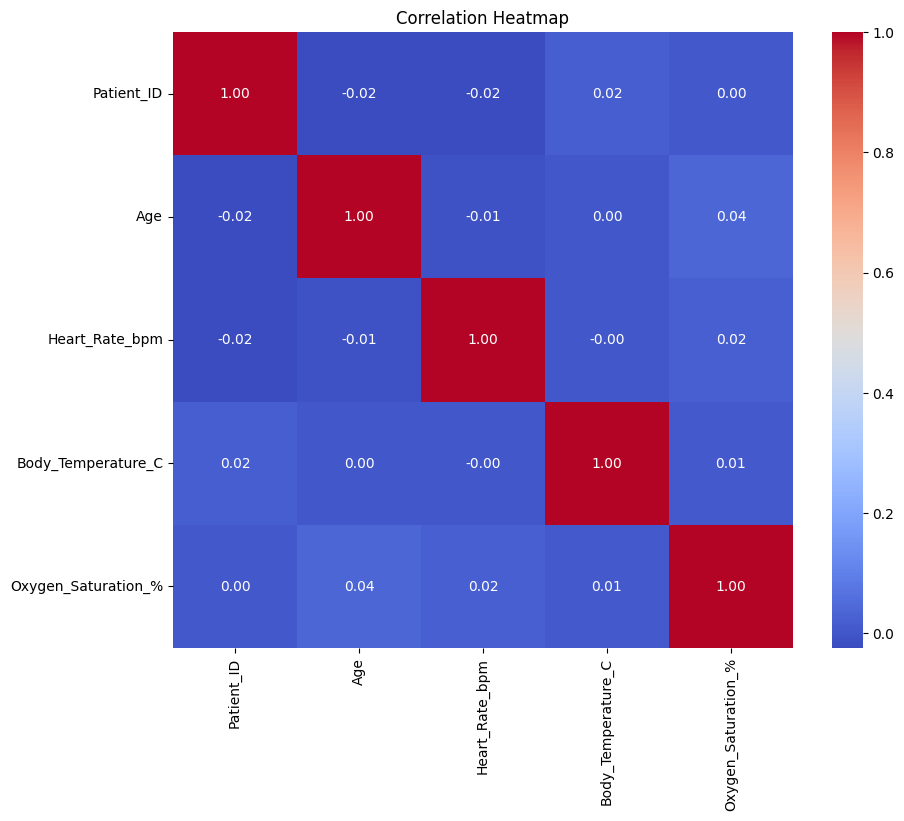

In [5]:
numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

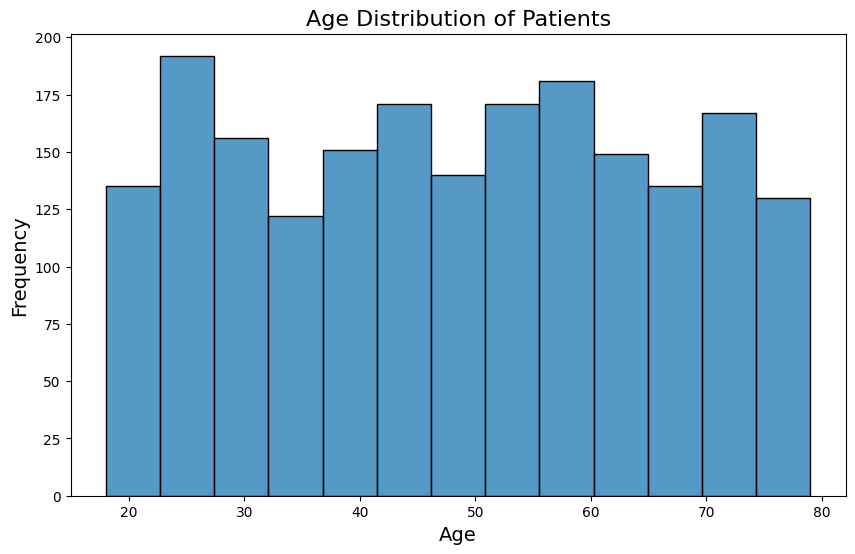

In [6]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'])#, bins=20, kde=True, color='blue')  # Uncommented bins and kde
plt.title('Age Distribution of Patients', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

/var/folders/89/59ty8zq957z_54g3w4zq08wc0000gn/T/ipykernel_12736/3821058572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set1')  # Changed to countplot for categorical data


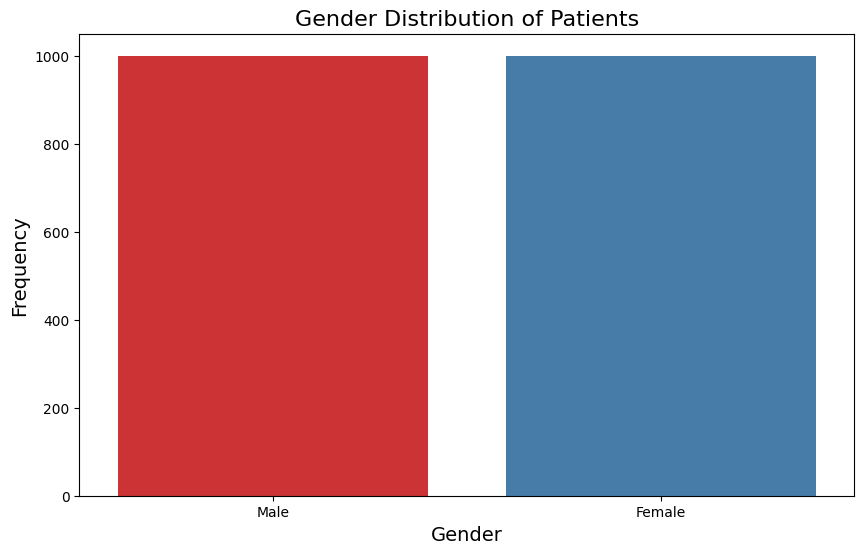

In [7]:
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df, palette='Set1')  # Changed to countplot for categorical data
plt.title('Gender Distribution of Patients', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

/var/folders/89/59ty8zq957z_54g3w4zq08wc0000gn/T/ipykernel_12736/2501428933.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='Set2')  # Changed to countplot for categorical data


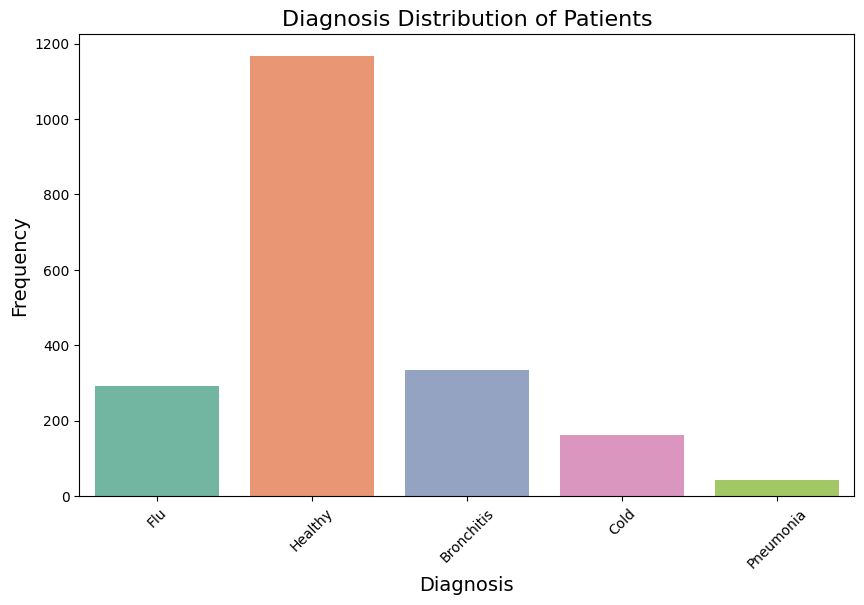

In [8]:
# Diagnosis Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnosis', data=df, palette='Set2')  # Changed to countplot for categorical data
plt.title('Diagnosis Distribution of Patients', fontsize=16)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

**Dataset contains more Healthy people**

/var/folders/89/59ty8zq957z_54g3w4zq08wc0000gn/T/ipykernel_12736/1035900011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Age', data=df, palette='Set3')


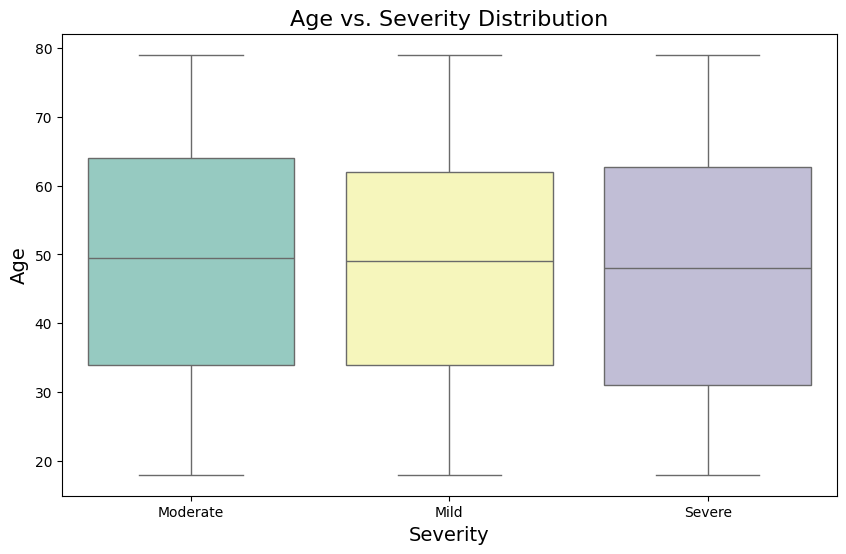

In [9]:
# Age vs Severity (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Age', data=df, palette='Set3')
plt.title('Age vs. Severity Distribution', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

**Dataset is balanced it has no outliers**

/var/folders/89/59ty8zq957z_54g3w4zq08wc0000gn/T/ipykernel_12736/371176721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Severity', y='Age', data=df, jitter=True, palette='Set2')


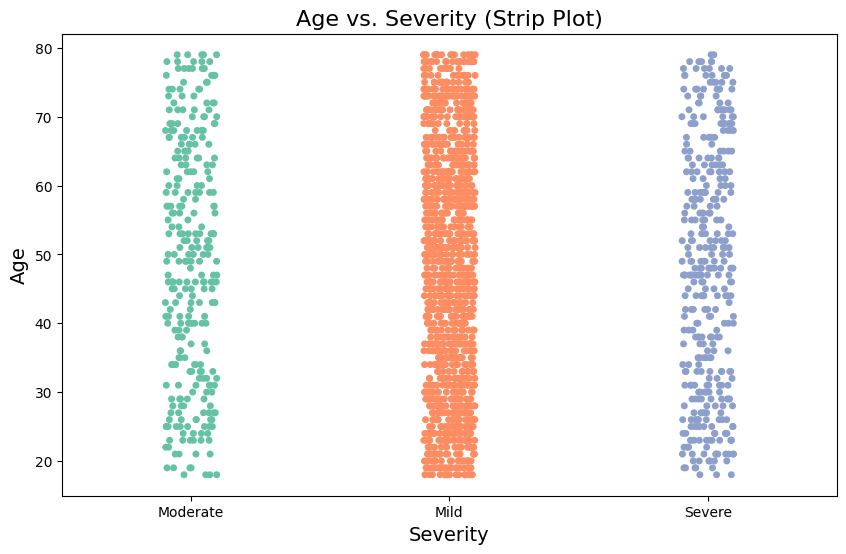

In [10]:
# Age vs Severity (Strip Plot)
plt.figure(figsize=(10, 6))
sns.stripplot(x='Severity', y='Age', data=df, jitter=True, palette='Set2')
plt.title('Age vs. Severity (Strip Plot)', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

/var/folders/89/59ty8zq957z_54g3w4zq08wc0000gn/T/ipykernel_12736/253202141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=treatment_counts.index, y=treatment_counts.values, palette='Set2')


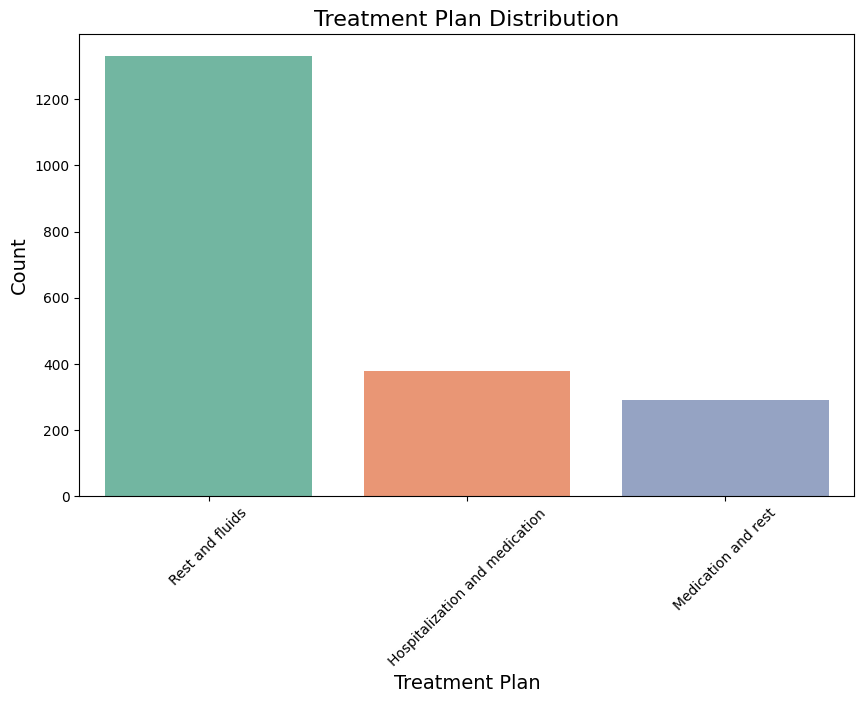

In [11]:
treatment_counts = df['Treatment_Plan'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=treatment_counts.index, y=treatment_counts.values, palette='Set2')
plt.title('Treatment Plan Distribution', fontsize=16)
plt.xlabel('Treatment Plan', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

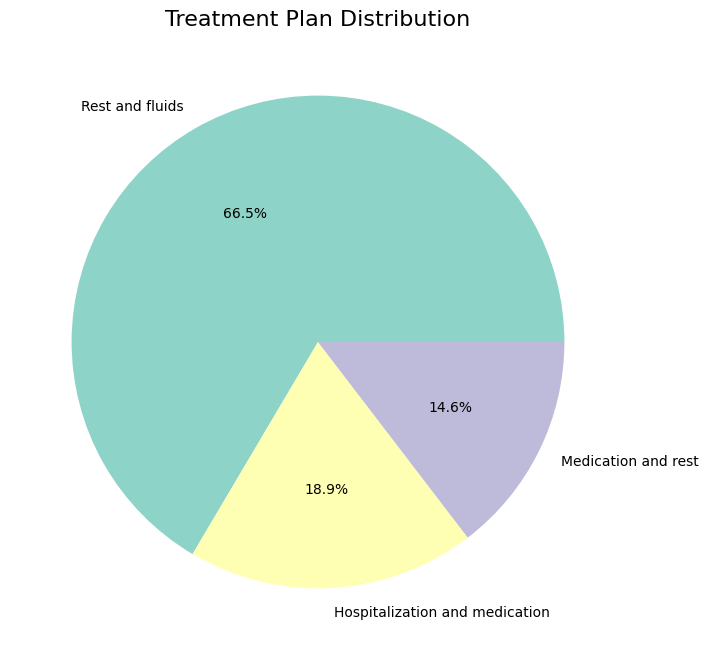

In [12]:
# Treatment Plan Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Treatment Plan Distribution', fontsize=16)
plt.show()

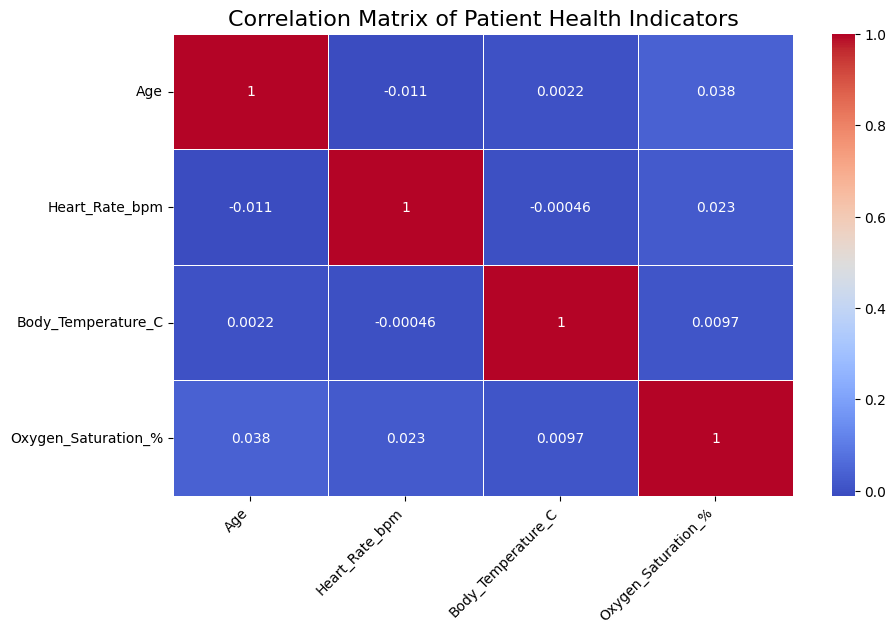

In [13]:
columns_to_analyze = ['Age', 'Heart_Rate_bpm', 'Body_Temperature_C', 'Oxygen_Saturation_%']
corr_matrix = df[columns_to_analyze].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Patient Health Indicators', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

**Dropping Patient ID and Treatment Plan because they are unnecessary for model training**

In [14]:
# Drop irrelevant columns
df.drop(columns=["Patient_ID", "Treatment_Plan"], inplace=True)

In [15]:
df.head()

,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity
0,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate
1,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild
2,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild
3,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild
4,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,Healthy,Mild


**Splitting features and targets**

In [16]:

X = df.drop(columns=["Diagnosis", "Severity"])
y_diagnosis = df["Diagnosis"]
y_severity = df["Severity"]

In [17]:
print(X,y_diagnosis,y_severity)

      Age  Gender            Symptom_1    Symptom_2            Symptom_3  \
0      74    Male              Fatigue  Sore throat                Fever   
1      66  Female          Sore throat      Fatigue                Cough   
2      32    Male            Body ache  Sore throat              Fatigue   
3      21  Female  Shortness of breath     Headache                Cough   
4      53    Male           Runny nose  Sore throat              Fatigue   
...   ...     ...                  ...          ...                  ...   
1995   23  Female          Sore throat   Runny nose  Shortness of breath   
1996   75    Male              Fatigue        Cough          Sore throat   
1997   79    Male              Fatigue   Runny nose                Fever   
1998   56  Female                Cough  Sore throat             Headache   
1999   45  Female              Fatigue    Body ache                Fever   

      Heart_Rate_bpm  Body_Temperature_C Blood_Pressure_mmHg  \
0                 69   

**Preprocessing categorical features**

In [18]:
categorical_features = ["Gender", "Symptom_1", "Symptom_2", "Symptom_3", "Blood_Pressure_mmHg"]
numerical_features = ["Age", "Heart_Rate_bpm", "Body_Temperature_C", "Oxygen_Saturation_%"]

In [19]:
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

**Scaling numerical features**

In [20]:
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

**Encode target labels**

In [21]:

diagnosis_le = LabelEncoder()
severity_le = LabelEncoder()
y_diagnosis_enc = diagnosis_le.fit_transform(y_diagnosis)
y_severity_enc = severity_le.fit_transform(y_severity)

**Splitting into train/test**

In [22]:
X_train, X_test, y_diag_train, y_diag_test, y_sev_train, y_sev_test = train_test_split(
    X, y_diagnosis_enc, y_severity_enc, test_size=0.2, random_state=42
)

# 3. Model Training Section

##  Model Training & Evaluation

Each model is trained **independently** for:
-  Diagnosis
-  Severity

We evaluate:
-  Accuracy
-  Confusion Matrix

### Random Forest

**Diagnosis**

In [23]:
model1_diag = RandomForestClassifier(random_state=42)
model1_diag.fit(X_train, y_diag_train)

RandomForestClassifier(random_state=42)

**Severity**

In [24]:
model1_sev = RandomForestClassifier(random_state=42)
model1_sev.fit(X_train, y_sev_train)

RandomForestClassifier(random_state=42)

### KNN Classifier

**Diagnosis**

In [25]:
model2_diag = KNeighborsClassifier(n_neighbors=5)
model2_diag.fit(X_train, y_diag_train)

KNeighborsClassifier()

**Severity**

In [26]:
model2_sev = KNeighborsClassifier(n_neighbors=5)
model2_sev.fit(X_train, y_sev_train)

KNeighborsClassifier()

### Naive Bayes

**Diagnosis**

In [27]:

model3_diag = GaussianNB()
model3_diag.fit(X_train, y_diag_train)

GaussianNB()

**Severity**

In [28]:
model3_sev = GaussianNB()
model3_sev.fit(X_train, y_sev_train)

GaussianNB()

# RESULTS

KNN - Diagnosis Accuracy: 0.95


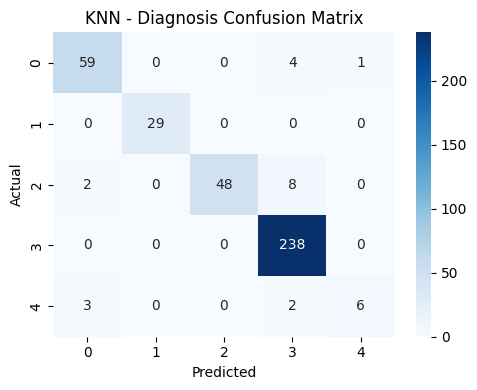

In [31]:
model1_diag_preds = model1_diag.predict(X_test)
model1_diag_acc = accuracy_score(y_diag_test, model1_diag_preds)
print(f"KNN - Diagnosis Accuracy: {model1_diag_acc:.2f}")
model1_diag_cm = confusion_matrix(y_diag_test, model1_diag_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(model1_diag_cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN - Diagnosis Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

KNN - Severity Accuracy: 0.95


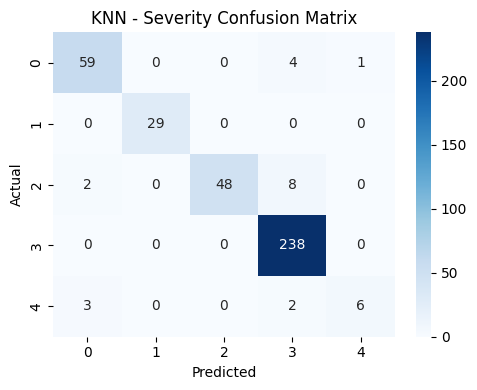

In [38]:
model1_sev_preds = model1_sev.predict(X_test)
model1_sev_acc = accuracy_score(y_sev_test, model1_sev_preds)
print(f"KNN - Severity Accuracy: {model1_diag_acc:.2f}")
model1_sev_cm = confusion_matrix(y_sev_test, model1_sev_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(model1_diag_cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN - Severity Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Random Forest - Diagnosis Accuracy: 0.49


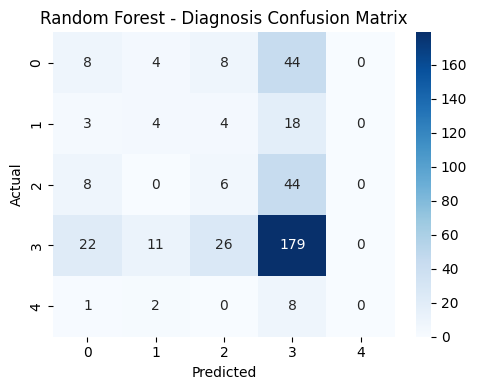

In [39]:
model2_diag_preds = model2_diag.predict(X_test)
model2_diag_acc = accuracy_score(y_diag_test, model2_diag_preds)
print(f"Random Forest - Diagnosis Accuracy: {model2_diag_acc:.2f}")
model2_diag_cm = confusion_matrix(y_diag_test, model2_diag_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(model2_diag_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Diagnosis Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Random Forest - Severity Accuracy: 0.65


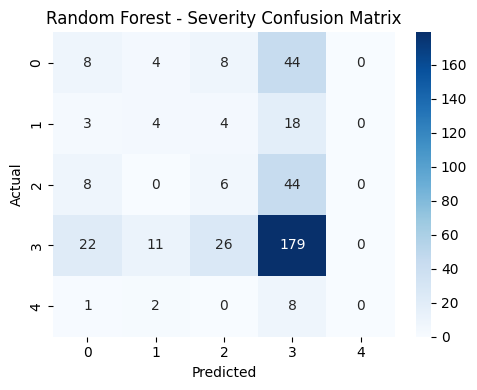

In [40]:
model2_sev_preds = model2_sev.predict(X_test)
model2_sev_acc = accuracy_score(y_sev_test, model2_sev_preds)
print(f"Random Forest - Severity Accuracy: {model2_sev_acc:.2f}")
model2_sev_cm = confusion_matrix(y_sev_test, model2_sev_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(model2_diag_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Severity Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Naive Bayes - Diagnosis Accuracy: 0.67


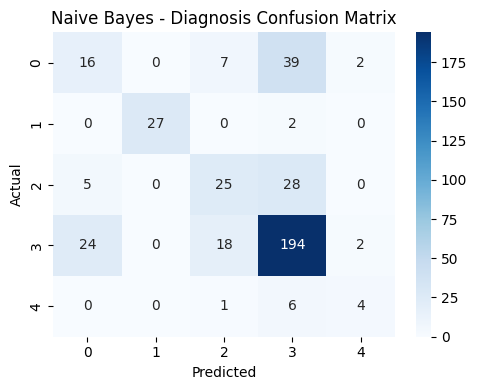

In [44]:
model3_diag_preds = model3_diag.predict(X_test)
model3_diag_acc = accuracy_score(y_diag_test, model3_diag_preds)
print(f"Naive Bayes - Diagnosis Accuracy: {model3_diag_acc:.2f}")
model3_diag_cm = confusion_matrix(y_diag_test, model3_diag_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(model3_diag_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes - Diagnosis Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Naive Bayes - Severity Accuracy: 0.68


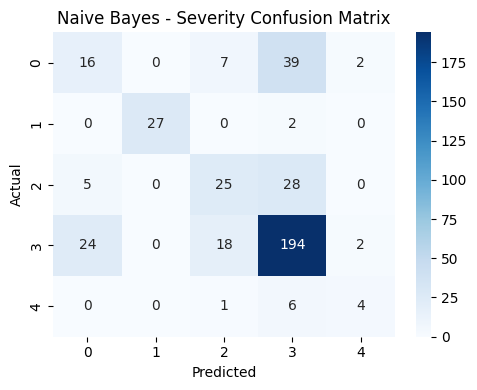

In [45]:
model3_sev_preds = model3_sev.predict(X_test)
model3_sev_acc = accuracy_score(y_sev_test, model3_sev_preds)
print(f"Naive Bayes - Severity Accuracy: {model3_sev_acc:.2f}")
model3_sev_cm = confusion_matrix(y_sev_test, model3_sev_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(model3_diag_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes - Severity Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Model Accuracy Comparison

/var/folders/89/59ty8zq957z_54g3w4zq08wc0000gn/T/ipykernel_12736/2232702545.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=model_accuracies, palette="Set2")


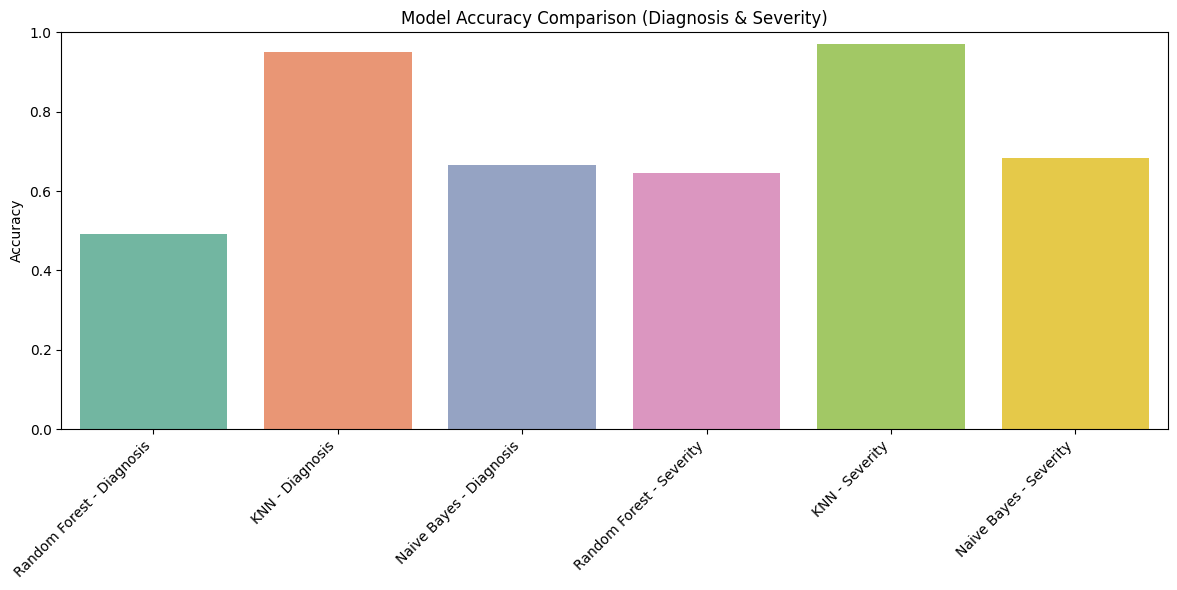

In [49]:
model_names = [
    "Random Forest - Diagnosis",
    "KNN - Diagnosis",
    "Naive Bayes - Diagnosis",
    "Random Forest - Severity",
    "KNN - Severity",
    "Naive Bayes - Severity"
]

model_accuracies = [
    model2_diag_acc,
    model1_diag_acc,
    model3_diag_acc,
    model2_sev_acc,
    model1_sev_acc,
    model3_sev_acc
]

plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=model_accuracies, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Diagnosis & Severity)")
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()


**We can see that KNN outperformed both Random Forest and Naive Bayes.
So we used KNN model for our project**